In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv ("C:\\Users\\Ale y Ali\\Downloads\\airline_passenger_satisfaction.csv")

# transformaciones

In [6]:
df = df.drop("id", axis= 1)
df = df.drop("Unnamed: 0", axis= 1)

In [7]:
mean_delay = df["Arrival Delay in Minutes"].mean()
df["Arrival Delay in Minutes"].fillna(mean_delay, inplace=True)

In [8]:
categoricas = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

numericas = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 
             'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
             'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
             'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [9]:
df_encoded = pd.get_dummies(df, columns=categoricas)

<Axes: >

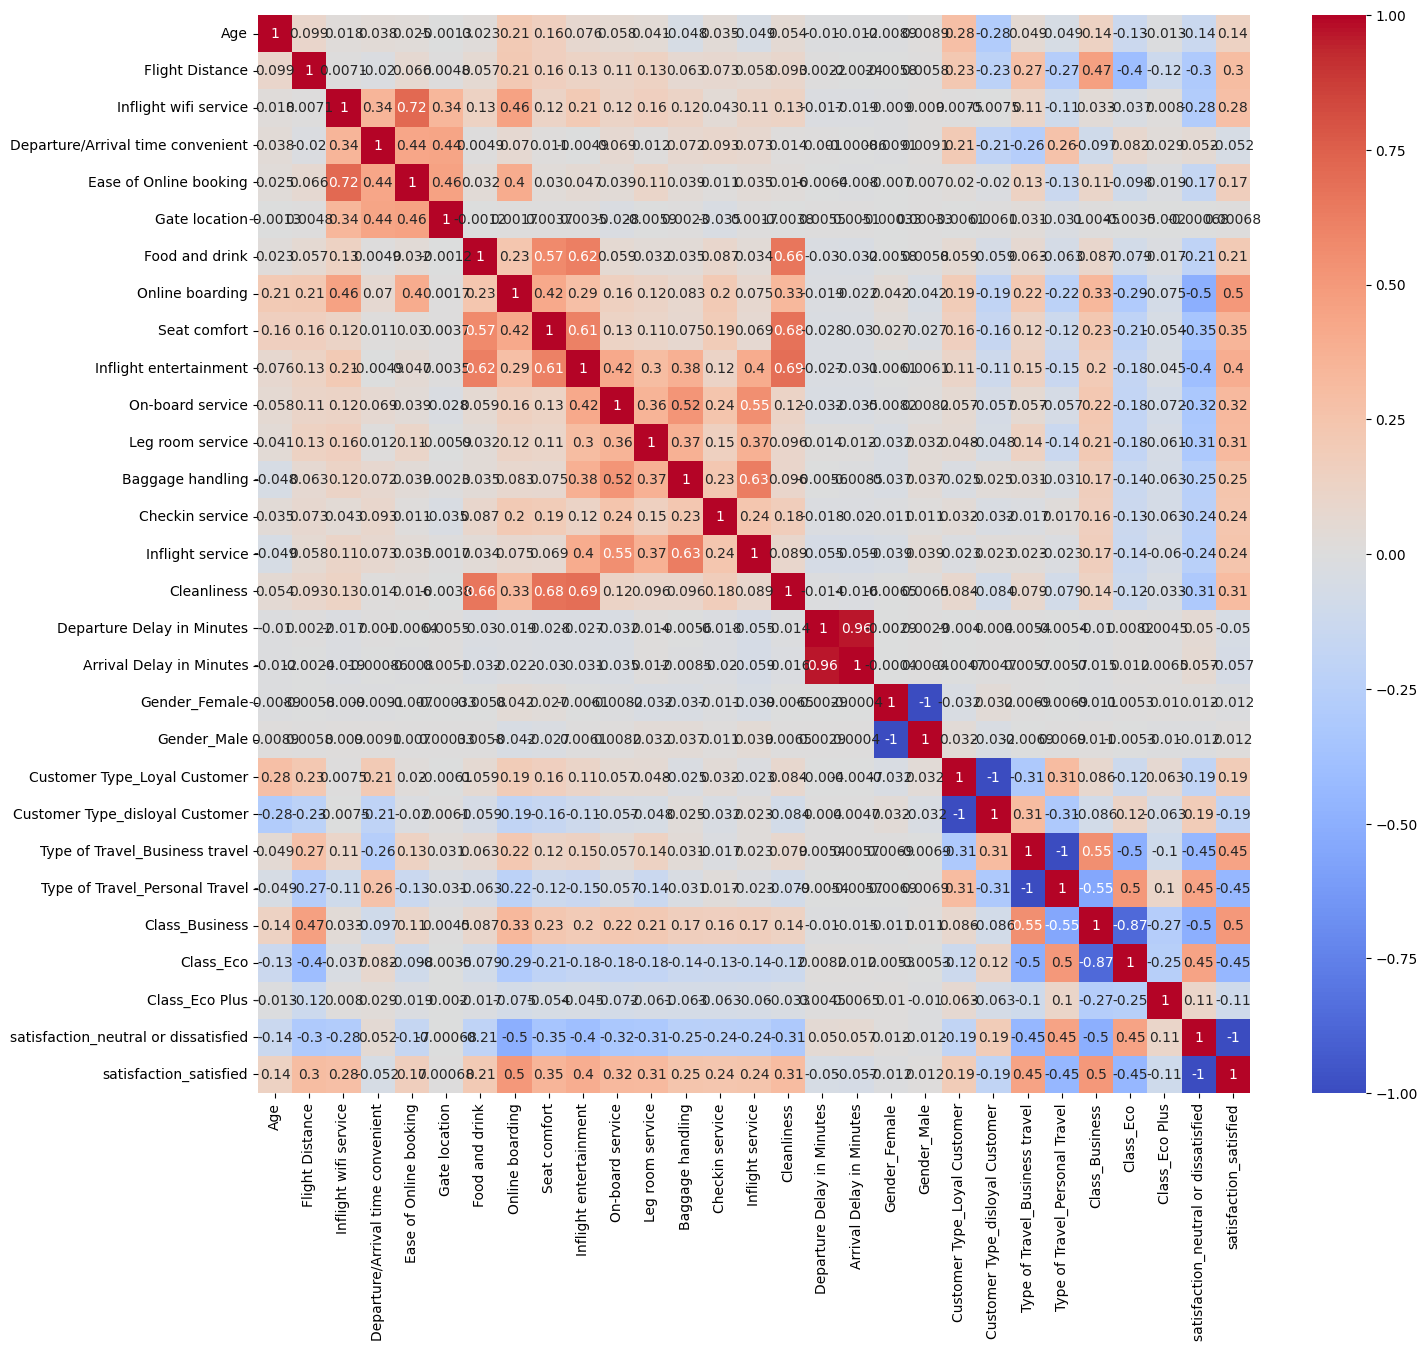

In [41]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# sigo

In [30]:
copy = df_encoded.copy()

In [31]:
def transform_satisfaction(df):
    df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
    return df

In [32]:
copy = transform_satisfaction(copy)

# gradient boosting

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = copy.drop(["satisfaction"], axis=1)
y = copy.satisfaction



# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reservo conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)




# Crea una instancia del clasificador GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,  # Número de árboles o estimadores a usar
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=3  # Profundidad máxima de los árboles
)

# Ajusta el modelo a los datos de entrenamiento
gb_classifier.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred = gb_classifier.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score (y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Accuracy: 0.9426
Precision: 0.9471
Recall: 0.9199
F1-Score: 0.9333


## intento fallido de randomizedsearch

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    "learning_rate":[0.005, 1e-3, 1e-4],
    "n_estimators": [100,200,300,400],
    "subsample": np.arange(0.1,1.0,0.2),
    "max_depth": np.arange(3,8,1),
}

gs = RandomizedSearchCV(GradientBoostingClassifier(), param_grid, scoring="accuracy", n_jobs=-1, verbose=2, n_iter=10)

#gs.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.005, 0.001, 0.0001],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': array([0.1, 0.3, 0.5, 0.7, 0.9])},
                   scoring='accuracy', verbose=2)

In [20]:
#gs.best_score_

0.9034300776061498

In [21]:
#gs.best_params_

{'subsample': 0.5000000000000001,
 'n_estimators': 300,
 'max_depth': 3,
 'learning_rate': 0.005}

In [22]:
#best_params = {'tol': 0.01,
 'subsample': 0.5,
 'n_estimators': 300,
 'min_weight_fraction_leaf': 0.0,
 'min_impurity_decrease': 0.1,
 'max_depth': 3,
 'learning_rate': 0.005,
 'ccp_alpha': 0.0}

## mejorando modelo

In [34]:
from sklearn.model_selection import cross_validate

gboost = GradientBoostingClassifier(**best_params)
crossval = cross_validate(gboost, X, y, cv=10, scoring="accuracy", error_score="raise")
crossval.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [24]:
crossval["test_score"]

array([0.89904725, 0.90424406, 0.90087576, 0.90607256, 0.90221367,
       0.90259865, 0.90895091, 0.90500481, 0.90481232, 0.90442733])

In [25]:
np.mean(crossval["test_score"])

0.9038247330160688

In [26]:
gboost.fit(X,y)

GradientBoostingClassifier(learning_rate=0.005, min_impurity_decrease=0.1,
                           n_estimators=300, subsample=0.5, tol=0.01)

In [27]:
importances = gboost.feature_importances_

In [28]:
names = gboost.feature_names_in_

C:\Users\Ale y Ali\miniconda3\envs\airline\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ale y Ali\miniconda3\envs\airline\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ale y Ali\miniconda3\envs\airline\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

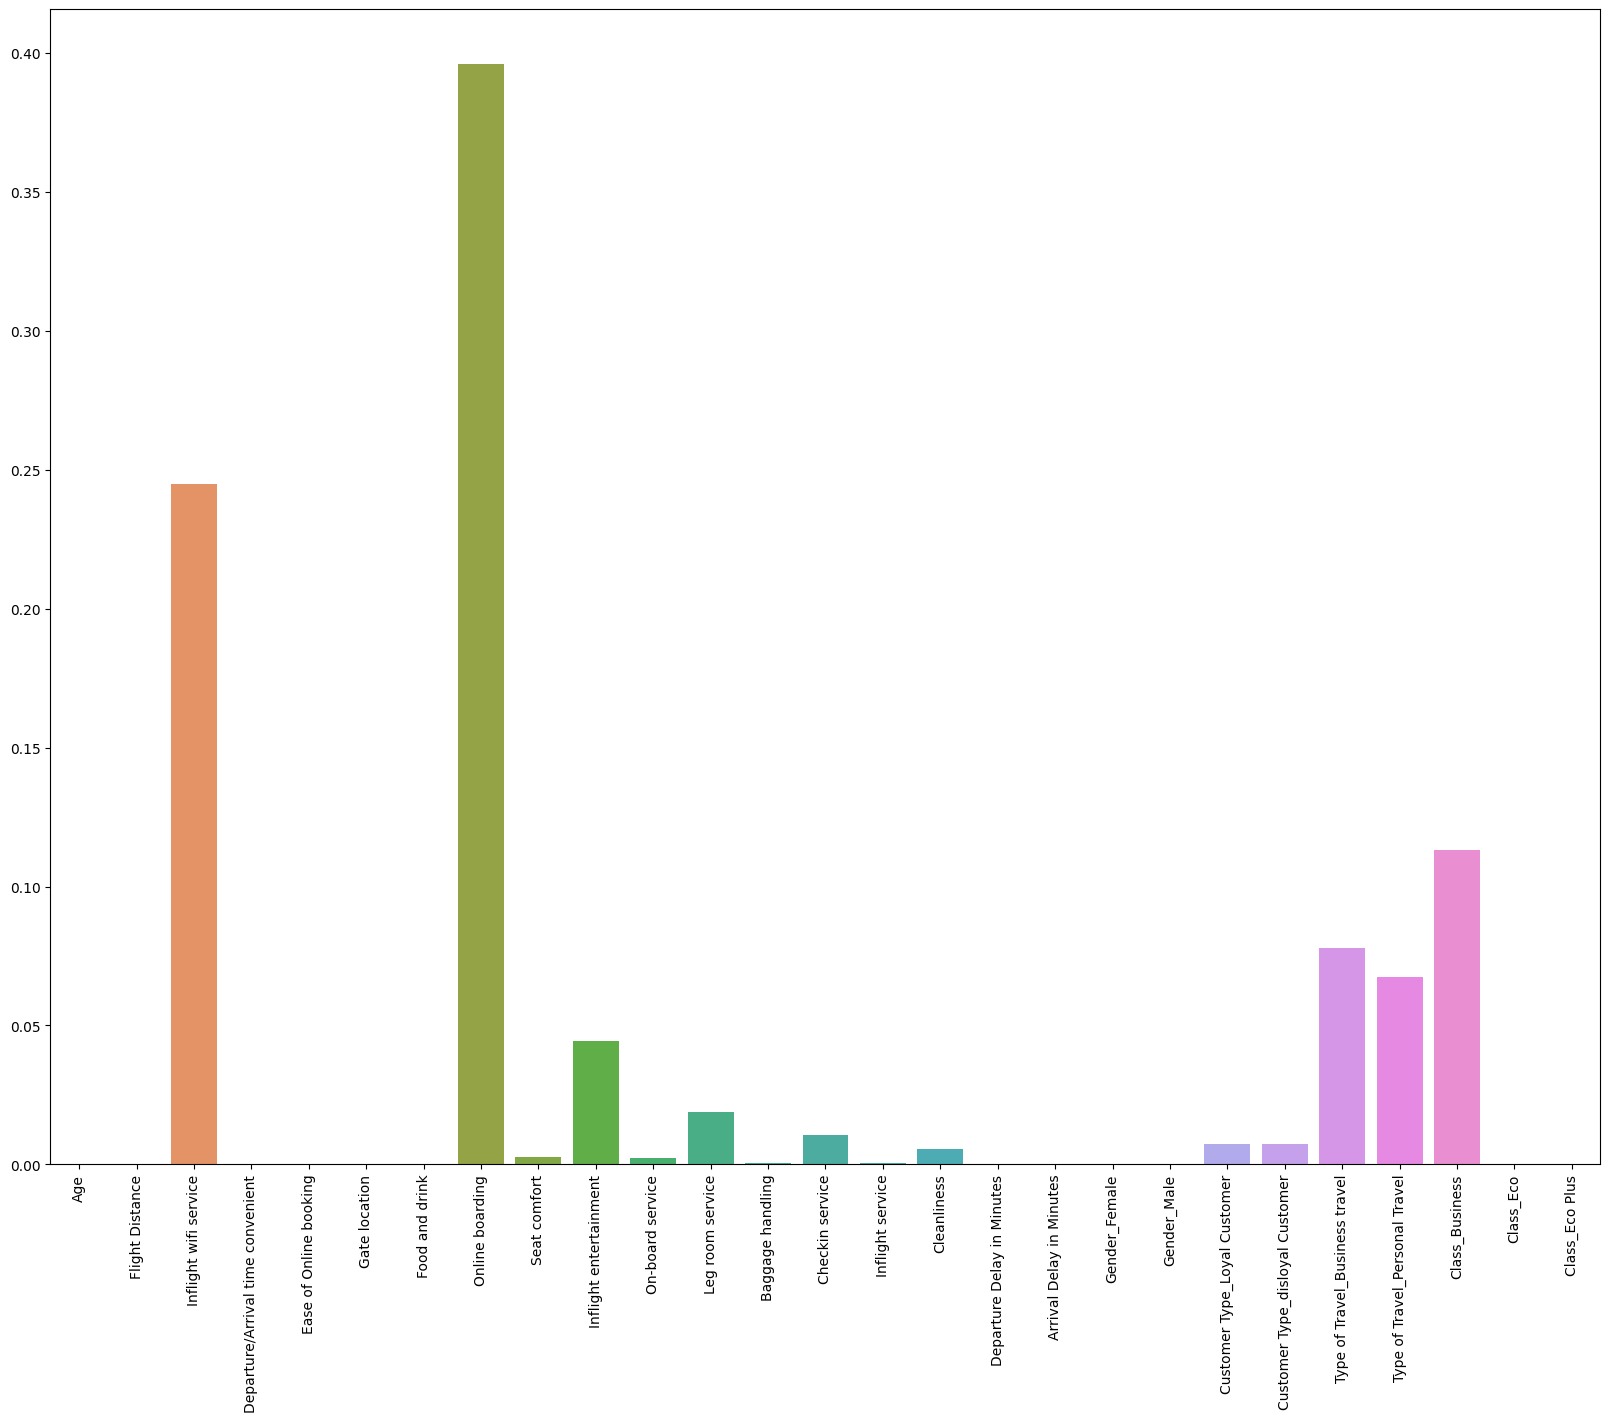

In [29]:
plt.figure(figsize=(20,15))
plot = sns.barplot(x=names, y=importances)
plt.xticks(rotation=90)
plot

# rANDOM FOREST

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Define las características numéricas que deseas escalar
numeric_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Crea una instancia del StandardScaler
scaler = StandardScaler()

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reservo conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


#df de validación para probar la API
df_val = pd.DataFrame(data=X_val, columns=X.columns)
df_val_labels = pd.DataFrame(data=y_val, columns=["satisfaction"])

# Ajusta el scaler a tus datos de entrenamiento y transforma las características numéricas
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Asegúrate de aplicar la misma transformación a tus datos de prueba y validación
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Crea una instancia del clasificador RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajusta el modelo a los datos de entrenamiento
rf_classifier.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred = rf_classifier.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Accuracy: 0.9622
Precision: 0.9733
Recall: 0.9392
F1-Score: 0.9559


In [41]:
import pickle

In [42]:
ruta_modelo_pickle = 'modelo_entrenado.pkl'
with open(ruta_modelo_pickle, 'wb') as archivo_pickle:
    pickle.dump(rf_classifier, archivo_pickle)

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features":  ['sqrt', 'log2', 0.5, None],
    "bootstrap": [True, False]
}

rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, scoring="accuracy", n_jobs=-1, verbose=2, n_iter=10)

# Ajusta el modelo a tus datos (X, y)
rs.fit(X, y)

# Obtén los mejores hiperparámetros y el mejor estimador
best_params = rs.best_params_
best_estimator = rs.best_estimator_

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros:")
print(best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Crear un clasificador Random Forest con tus hiperparámetros deseados
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Realizar validación cruzada con 10 folds y puntuación de precisión
scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy')

# Imprimir las puntuaciones de precisión para cada fold
print("Puntuaciones de precisión para cada fold:", scores)

# Calcular la precisión media y la desviación estándar de las puntuaciones
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print(f'Precisión media: {mean_accuracy:.4f}')
print(f'Desviación estándar: {std_accuracy:.4f}')